In [926]:

import tensorflow
import keras
from keras import layers
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Conv2DTranspose, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [927]:
#ENCODER
model = Sequential()
model.add(Conv2D(input_shape=(64,64,1),filters=64,kernel_size=(2,2),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=100, kernel_size=(2,2), strides=2, activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(2,2), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(2,2), padding="same", activation="relu"))
# # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512,kernel_size=(2,2),padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(UpSampling2D(2))

model.add(Conv2D(filters=256, kernel_size=(2,2), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(UpSampling2D(2))

model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(UpSampling2D(2))


# model.add(Conv2D(filters=50, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(BatchNormalization())
# model.add(UpSampling2D(2))


model.add(Conv2D(filters=64, kernel_size=(2,2), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(UpSampling2D(2))
model.add(Conv2D(filters=3, kernel_size=(2,2), padding="same", activation="relu"))
model.summary()

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1432 (Conv2D)        (None, 64, 64, 64)        320       
                                                                 
 batch_normalization_708 (Ba  (None, 64, 64, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_299 (MaxPooli  (None, 32, 32, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_1433 (Conv2D)        (None, 32, 32, 128)       32896     
                                                                 
 batch_normalization_709 (Ba  (None, 32, 32, 128)      512       
 tchNormalization)                                               
                                                     

In [928]:
# model = Sequential()
# model.add(Conv2D(input_shape=(64,64,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


# # model.add(Flatten())
# # model.add(Dense(units=144,activation="relu"))
# # model.add(Dense(units=144,activation="relu"))
# # model.add(Reshape((12,12,1)))

# model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(UpSampling2D(2))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(UpSampling2D(2))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(UpSampling2D(2))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(UpSampling2D(2))

# model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(UpSampling2D(2))

# model.add(Dense(units=3, activation="softmax"))
# model.summary()

In [929]:
model.compile(optimizer="adam", loss="MSE")


In [930]:
train_path="D:\College 4\Selected\A5\Pet\Train"
test_path="D:\College 4\Selected\A5\Pet\Test"

In [931]:
train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(64,64))

        train.append(img_arr)

test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(64,64))

        test.append(img_arr)

In [932]:
X_train = np.array(train)
X_test = np.array(test)
X_train=X_train[:20,:]
X_train.shape

(20, 64, 64, 3)

In [933]:
print(X_train.shape)
print(X_test.shape)

(20, 64, 64, 3)
(24, 64, 64, 3)


In [934]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [935]:
X_train_gray = X_train.copy()

In [936]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [937]:
photos = []
for i in X_train_gray:
     photos.append(rgb2gray(i))
photos = np.array(photos)  
photos.shape   

(20, 64, 64)

In [938]:
print(X_train.shape)
print(X_test.shape)

(20, 64, 64, 3)
(24, 64, 64, 3)


In [939]:
model.fit(photos,X_train,epochs=1000,batch_size=20,shuffle=True)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.7600
Epoch 2/1000
1/1 [==============================] - 1s 503ms/step - loss: 0.7537
Epoch 3/1000
1/1 [==============================] - 1s 526ms/step - loss: 0.3416
Epoch 4/1000
1/1 [==============================] - 0s 467ms/step - loss: 0.2546
Epoch 5/1000
1/1 [==============================] - 1s 527ms/step - loss: 0.2201
Epoch 6/1000
1/1 [==============================] - 0s 482ms/step - loss: 0.1915
Epoch 7/1000
1/1 [==============================] - 0s 438ms/step - loss: 0.1709
Epoch 8/1000
1/1 [==============================] - 1s 508ms/step - loss: 0.1579
Epoch 9/1000
1/1 [==============================] - 0s 480ms/step - loss: 0.1466
Epoch 10/1000
1/1 [==============================] - 0s 445ms/step - loss: 0.1384
Epoch 11/1000
1/1 [==============================] - 0s 437ms/step - loss: 0.1314
Epoch 12/1000
1/1 [==============================] - 0s 422ms/step - loss: 0.1249
Epoch 13/1000
1/1 [=========

In [940]:
p1 =model.predict(photos)

1/1 [==============================] - 0s 268ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


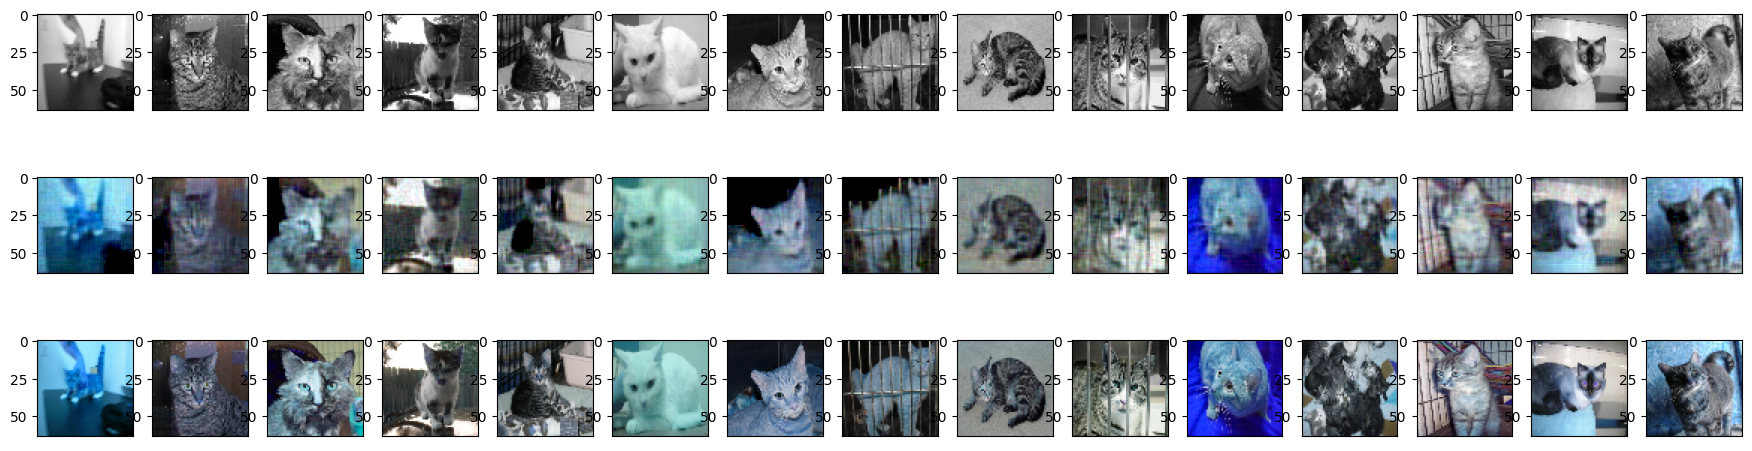

In [941]:
n=15
plt.figure(figsize=(22,6))
for i in range(n):
    ax=plt.subplot(3,n,i+1)
    plt.imshow(photos[i],cmap=plt.get_cmap('gray'))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax=plt.subplot(3,n,i+1+n)
    plt.imshow(p1[i])
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

    ax=plt.subplot(3,n,i+1+n*2)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()